--- Keşifsel Veri Analizi Başladı ---


C:\Users\yldzy\AppData\Local\Temp\ipykernel_19704\832057221.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_expensive', palette='viridis')


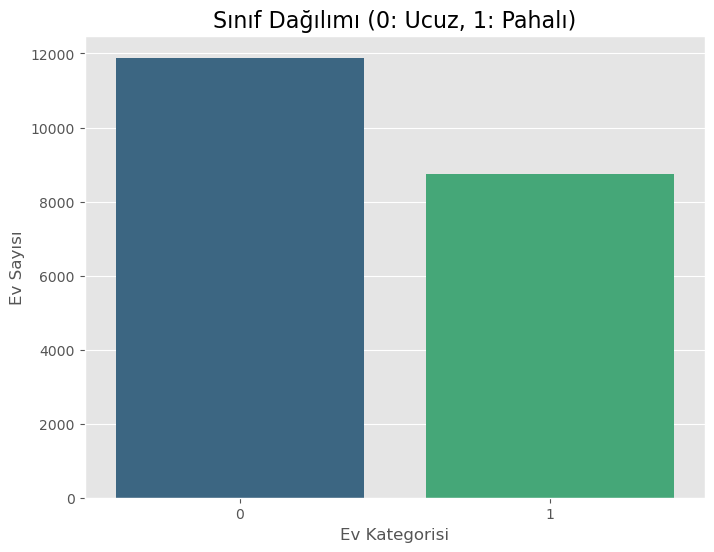

C:\Users\yldzy\AppData\Local\Temp\ipykernel_19704\832057221.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='is_expensive', y='median_income', data=df, palette='viridis')
C:\Users\yldzy\AppData\Local\Temp\ipykernel_19704\832057221.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[1], x='is_expensive', y='housing_median_age', data=df, palette='viridis')


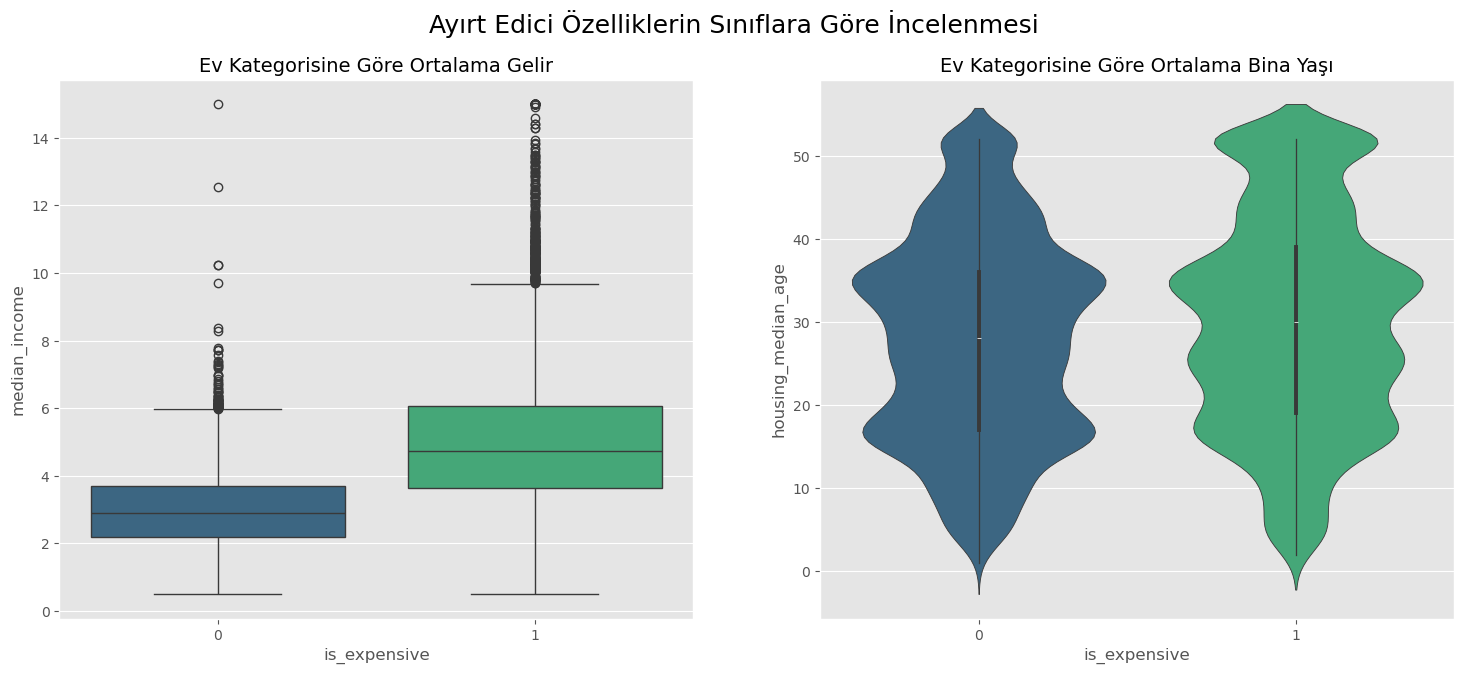


--- Keşifsel Veri Analizi Tamamlandı ---

--- Model Eğitimi Başlıyor ---

--- Model Sonuçları ---
Accuracy: 0.8418

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      2377
           1       0.83      0.79      0.81      1751

    accuracy                           0.84      4128
   macro avg       0.84      0.83      0.84      4128
weighted avg       0.84      0.84      0.84      4128



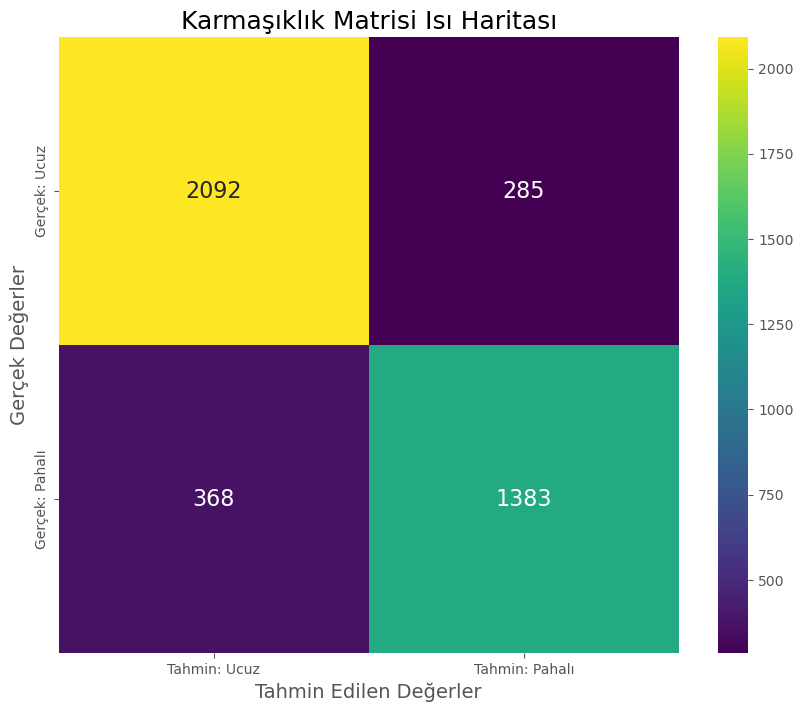

In [1]:
# ==============================================================================
#                      1. GEREKLİ KÜTÜPHANELERİ YÜKLEME
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Grafiklerin notebook içinde daha güzel görünmesi için ayarlar
%matplotlib inline
plt.style.use('ggplot')

# ==============================================================================
#         2. VERİYİ GÜVENİLİR KAYNAKTAN YÜKLEME VE HAZIRLAMA
# ==============================================================================
# Dışarıdaki bir CSV dosyasına güvenmek yerine, veriyi her zaman tutarlı olan
# standart kaynaktan (Aurelien Geron'un GitHub reposu) çekiyoruz.
# Bu, sütun isimlerinin her zaman doğru olmasını ('median_income' gibi) garanti eder.
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
df = pd.read_csv(url)

# Hedef değişkenimizi (is_expensive) oluşturalım. Eşik: 200,000$
df["is_expensive"] = (df["median_house_value"] >= 200000).astype(int)

# ==============================================================================
#                   3. KEŞİFSEL VERİ ANALİZİ (EDA)
# ==============================================================================
# Artık df'in doğru olduğuna emin olduğumuz için görselleştirmeleri yapabiliriz.

print("--- Keşifsel Veri Analizi Başladı ---")

# 3.1 Sınıf Dağılımı Grafiği
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_expensive', palette='viridis')
plt.title('Sınıf Dağılımı (0: Ucuz, 1: Pahalı)', fontsize=16)
plt.xlabel('Ev Kategorisi', fontsize=12)
plt.ylabel('Ev Sayısı', fontsize=12)
plt.show()

# 3.2 Ayırt Edici Özelliklerin Grafikleri
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
plt.suptitle('Ayırt Edici Özelliklerin Sınıflara Göre İncelenmesi', fontsize=18)

# Gelir karşılaştırması
sns.boxplot(ax=axes[0], x='is_expensive', y='median_income', data=df, palette='viridis')
axes[0].set_title('Ev Kategorisine Göre Ortalama Gelir', fontsize=14)

# Bina yaşı karşılaştırması
sns.violinplot(ax=axes[1], x='is_expensive', y='housing_median_age', data=df, palette='viridis')
axes[1].set_title('Ev Kategorisine Göre Ortalama Bina Yaşı', fontsize=14)
plt.show()

print("\n--- Keşifsel Veri Analizi Tamamlandı ---")
print("\n--- Model Eğitimi Başlıyor ---")

# ==============================================================================
#                             4. MODELLEME
# ==============================================================================

# 4.1 Veri Ön İşleme (Eksik Veri ve Kategorik Değişkenler)
# Eksik verileri doldurma
df.fillna(df.median(numeric_only=True), inplace=True)
# Kategorik değişkeni one-hot encoding yapma
df_encoded = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

# Özellikleri ve hedefi ayırma
X = df_encoded.drop(columns=["median_house_value", "is_expensive"])
y = df_encoded["is_expensive"]

# 4.2 Veriyi Bölme ve Ölçekleme
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4.3 Modeli Eğitme
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

# 4.4 Tahmin Yapma
y_pred = model.predict(X_test_scaled)

# ==============================================================================
#                         5. MODEL DEĞERLENDİRME
# ==============================================================================
print("\n--- Model Sonuçları ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Karmaşıklık Matrisini (Confusion Matrix) görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Tahmin: Ucuz', 'Tahmin: Pahalı'],
            yticklabels=['Gerçek: Ucuz', 'Gerçek: Pahalı'],
            annot_kws={"size": 16})
plt.title('Karmaşıklık Matrisi Isı Haritası', fontsize=18)
plt.ylabel('Gerçek Değerler', fontsize=14)
plt.xlabel('Tahmin Edilen Değerler', fontsize=14)
plt.show()